In [ ]:
#setup and load date

In [ ]:
1.1 #install dependencies and setup

In [1]:
import tensorflow as tf

import os

2022-05-02 14:21:23.894040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 14:21:23.894108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [29]:
os.listdir('/content/drive/MyDrive/workout_img')

['plank', 'hip bridge']

In [ ]:
1.2#Remove dodgy images

In [5]:
import cv2
import imghdr

In [30]:
data_dir_train = '/content/drive/MyDrive/workout_img/'

In [31]:
len(os.listdir(os.path.join(data_dir_train,'hip bridge')))

355

In [32]:
len(os.listdir(os.path.join(data_dir_train,'plank')))

272

In [ ]:
len(os.listdir(os.path.join(data_dir_train,'squat')))

166

In [33]:
for image_class in os.listdir(data_dir_train):
  print(image_class)

plank
hip bridge


In [12]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from PIL import Image

In [34]:
def load_im_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/MyDrive/workout_img'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'hip bridge':0,'plank':1}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0 or elt.find('.jpeg')>0 or elt.find('.png')>0 or elt.find('.gif')>0]
        for img in tqdm(images_path[:120]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path).convert('RGB')
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /7.)
    #second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_train = X[:first_split], X[first_split:]
    y_test, y_train = y[:first_split], y[first_split:]
    
    return X_train, y_train, X_test, y_test, num_classes

In [35]:
X_train, y_train, X_test, y_test, num_classes = load_im_data('colab')

100%|██████████| 120/120 [00:04<00:00, 29.70it/s]


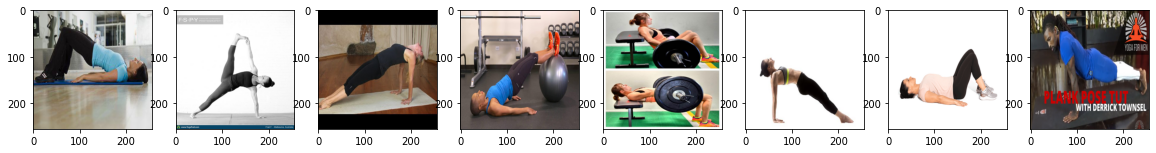

In [36]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

In [37]:
print(X_train.shape, X_test.shape)

(206, 256, 256, 3) (34, 256, 256, 3)


In [ ]:
#deep learning 

In [ ]:
3.1#build model

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(32, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(16, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(16, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    #opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model_homemade = load_own_model()
model_homemade.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 247, 247, 32)      9632      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 116, 116, 16)      32784     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 58, 58, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 51, 51, 16)       

In [ ]:
3.2#train

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'auto', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model_homemade.fit(X_train, y_train,
                             validation_split=0.2,
                             batch_size = 32, 
                             epochs = 50, 
                             callbacks=[es])

Epoch 1/50
8/8 [==============================] - 82s 10s/step - loss: 1.1311 - accuracy: 0.3279 - val_loss: 1.0921 - val_accuracy: 0.3387
Epoch 2/50
8/8 [==============================] - 81s 10s/step - loss: 1.0837 - accuracy: 0.4251 - val_loss: 1.0981 - val_accuracy: 0.4032
Epoch 3/50
8/8 [==============================] - 81s 10s/step - loss: 1.0542 - accuracy: 0.4291 - val_loss: 1.0336 - val_accuracy: 0.4194
Epoch 4/50
8/8 [==============================] - 81s 10s/step - loss: 0.9175 - accuracy: 0.6073 - val_loss: 0.9950 - val_accuracy: 0.4677
Epoch 5/50
8/8 [==============================] - 81s 10s/step - loss: 0.7545 - accuracy: 0.6721 - val_loss: 1.1147 - val_accuracy: 0.4677
Epoch 6/50
8/8 [==============================] - 81s 10s/step - loss: 0.6595 - accuracy: 0.7206 - val_loss: 1.0309 - val_accuracy: 0.4516
Epoch 7/50
8/8 [==============================] - 81s 10s/step - loss: 0.5583 - accuracy: 0.7895 - val_loss: 1.1536 - val_accuracy: 0.5484
Epoch 8/50
8/8 [===========

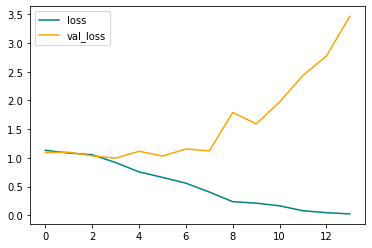

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],color = 'teal',label = 'loss')
plt.plot(history.history['val_loss'],color = 'orange',label = 'val_loss')
plt.legend()
plt.show()


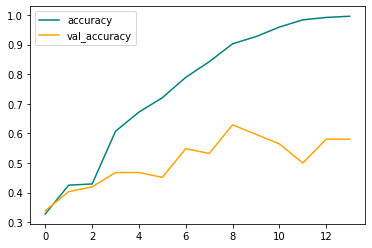

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate model

In [ ]:
4.1#evaluate

In [ ]:
res = model_homemade.evaluate(X_test, y_test)
res

2/2 [==============================] - 2s 563ms/step - loss: 0.8359 - accuracy: 0.7059


[0.8358829021453857, 0.7058823704719543]

In [ ]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 71.0 %


In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
y_pred = model_homemade.predict(X_test)
pre.update_state(y_test,y_pred)
re.update_state(y_test,y_pred)
acc.update_state(y_test,y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=51.0>

In [ ]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.6666667, shape=(), dtype=float32) tf.Tensor(0.39215687, shape=(), dtype=float32) tf.Tensor(0.7320261, shape=(), dtype=float32)


In [ ]:
y_pred

array([[0.31206262, 0.22315656, 0.46478078],
       [0.5184048 , 0.22563204, 0.2559632 ],
       [0.10802937, 0.672935  , 0.2190356 ],
       [0.09245341, 0.74672437, 0.16082224],
       [0.3507879 , 0.07883797, 0.57037413],
       [0.35932156, 0.3787249 , 0.2619535 ],
       [0.34291658, 0.48286438, 0.17421901],
       [0.32144716, 0.4527651 , 0.22578779],
       [0.26594678, 0.5123014 , 0.22175188],
       [0.5133362 , 0.24817923, 0.23848465],
       [0.28155923, 0.41590282, 0.30253795],
       [0.25804242, 0.39742687, 0.34453076],
       [0.22176655, 0.12259971, 0.6556338 ],
       [0.24127232, 0.17916985, 0.57955784],
       [0.4111052 , 0.22246666, 0.36642817],
       [0.39204508, 0.2347608 , 0.37319416],
       [0.2779067 , 0.28125116, 0.44084215],
       [0.47350472, 0.13906276, 0.38743246],
       [0.16771762, 0.07778203, 0.7545003 ],
       [0.2518975 , 0.5832956 , 0.16480698],
       [0.19767198, 0.5098274 , 0.29250067],
       [0.26610398, 0.5274376 , 0.20645837],
       [0.

In [ ]:
4.2#test

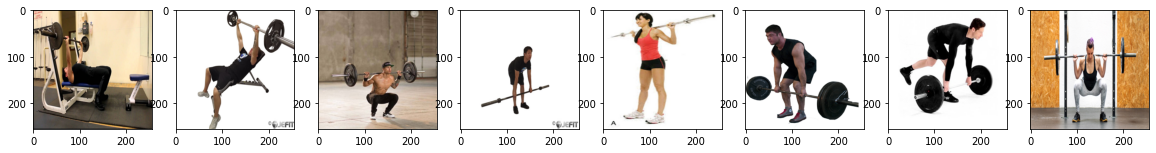

In [ ]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_test[i])

In [ ]:
#save model

In [ ]:
from tensorflow.keras.models import load_model
import joblib

In [ ]:
model.save(os.path.join('sample_data','imgmodel.joblib'))

In [ ]:
new_model = load_model(os.path.join('sample_data','imgmodel.joblib'))

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))

array([[0.9370359]], dtype=float32)